<a href="https://colab.research.google.com/github/VARDHAN-BORA/Masters_Capstone/blob/main/Citibike_dec%2Cjan_Comaparsion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.preprocessing import LabelEncoder
from geopy.distance import geodesic

In [30]:
print(df.columns)
print(len(df))

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'duration', 'ride_date'],
      dtype='object')
1000000


In [31]:
# Load the Citi Bike dataset
file_path ='/content/202412-citibike-tripdata_1.csv'
Until_dec14 = pd.read_csv(file_path)


<ipython-input-31-effc251a8e5d>:3: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  Until_dec14 = pd.read_csv(file_path)


In [32]:
# Display the first/last few rows of the dataset
Until_dec14.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,B44E5B10AEE58AD0,classic_bike,2024-12-14 10:58:18.153,2024-12-14 11:11:11.308,Frederick Douglass Blvd & W 145 St,7954.12,E 138 St & 5 Ave,7809.13,40.823061,-73.941928,40.814490,-73.936153,member
1,BC252DC6A6011556,electric_bike,2024-12-12 14:46:12.473,2024-12-12 16:45:37.777,Madison Ave & E 99 St,7443.01,NaN,NaN,40.789485,-73.952429,40.780000,-73.960000,member
2,6FBE55EF6FE8736D,electric_bike,2024-12-11 07:55:18.770,2024-12-11 08:02:23.460,Columbia St & Kane St,4422.05,NaN,NaN,40.687632,-74.001626,40.690000,-74.000000,member
3,908890DE7FDCF9FE,electric_bike,2024-12-09 22:51:11.668,2024-12-09 22:57:43.495,E 13 St & 2 Ave,5820.08,E 10 St & 2 Ave,5746.02,40.731539,-73.985302,40.729708,-73.986598,member
4,D5D366379A4DC0A8,classic_bike,2024-12-10 18:48:40.063,2024-12-10 19:10:32.264,11 Ave & W 41 St,6726.01,E 25 St & 1 Ave,6004.07,40.760301,-73.998842,40.738177,-73.977387,member


In [33]:
Until_dec14.tail()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
999995,4D7A0F3A9B538327,classic_bike,2024-12-06 18:43:51.866,2024-12-06 18:50:29.033,5 Ave & E 30 St,6248.08,10 Ave & W 28 St,6459.04,40.745985,-73.986295,40.750664,-74.001768,member
999996,93C022D486F87ABC,classic_bike,2024-12-10 10:34:58.071,2024-12-10 10:51:49.151,Lafayette St & Grand St,5422.09,10 Ave & W 28 St,6459.04,40.720280,-73.998790,40.750664,-74.001768,member
999997,20A11C486859F19B,electric_bike,2024-12-03 14:02:29.375,2024-12-03 14:07:51.452,Lenox Ave & W 117 St,7655.22,W 110 St & Amsterdam Ave,7646.04,40.802557,-73.949078,40.802692,-73.962950,member
999998,4D27B49621858BF9,electric_bike,2024-12-05 07:03:08.210,2024-12-05 07:06:03.572,Watts St & Greenwich St,5578.02,West St & Chambers St,5329.03,40.724055,-74.009660,40.717548,-74.013221,casual
999999,AA99DCFF9F464CC0,electric_bike,2024-12-09 08:33:59.397,2024-12-09 08:46:22.344,Washington Ave & E 174 St,8277.03,Courtlandt Ave & E 149 St,7840.05,40.843079,-73.900216,40.816402,-73.919549,member


# Total number of columns :


1. Ride ID
2. Rideable type
3. Started at
4. Ended at
5. Start station name
6. Start station ID
7. End station name
8. End station ID
9. Start latitude
10. Start longitude
11. End latitude
12. End Longitude
13. Member or casual ride






In [34]:
# Convert 'started_at' to datetime format
df['started_at'] = pd.to_datetime(df['started_at'])

# Calculate trip duration in minutes
df['duration'] = (pd.to_datetime(df['ended_at']) - df['started_at']).dt.total_seconds() / 60

# Extract the date part of 'started_at' for grouping
df['ride_date'] = df['started_at'].dt.date

# Group by ride date and aggregate
aggregated_df = df.groupby('ride_date').agg(
    total_rides=('ride_id', 'count'),                # Total number of rides
    total_duration=('duration', 'sum'),              # Total duration of all rides on that date
    avg_duration=('duration', 'mean'),               # Average duration of rides on that date
    classic_bike_rides=('rideable_type', lambda x: (x == 'classic_bike').sum()),  # Count of classic bike rides
    electric_bike_rides=('rideable_type', lambda x: (x == 'electric_bike').sum()), # Count of electric bike rides
    casual_rides=('member_casual', lambda x: (x == 'casual').sum()),              # Count of casual rider rides
    member_rides=('member_casual', lambda x: (x == 'member').sum())              # Count of member rider rides
).reset_index()

# Display the aggregated data using IPython.display
from IPython.display import display
display(aggregated_df) # Using display from IPython.display to show the dataframe


,ride_date,total_rides,total_duration,avg_duration,classic_bike_rides,electric_bike_rides,casual_rides,member_rides
0,2024-11-30,214,21286.629133,99.470230,52,162,50,164
1,2024-12-01,46725,481989.463283,10.315451,14676,32049,6468,40257
2,2024-12-02,74197,729721.964683,9.834925,24143,50054,6741,67456
3,2024-12-03,84153,848105.886533,10.078142,26658,57495,7709,76444
4,2024-12-04,85831,864700.982767,10.074460,26239,59592,8019,77812
5,2024-12-05,77489,753832.730400,9.728255,22453,55036,7368,70121
6,2024-12-06,75534,749980.145733,9.929041,21466,54068,8004,67530
7,2024-12-07,69558,774554.335850,11.135374,20340,49218,11447,58111
8,2024-12-08,76494,917438.615467,11.993602,23653,52841,13637,62857
9,2024-12-09,71309,752357.035183,10.550660,22832,48477,7087,64222


# Combining all the 3 datafiles into one  ~ Nov 30 - Dec 31



In [56]:
# Load the three CSV files
file_1 = '/content/202412-citibike-tripdata_1.csv'
file_2 = '/content/202412-citibike-tripdata_2.csv'
file_3 = '/content/202412-citibike-tripdata_3.csv'

df1 = pd.read_csv(file_1)
df2 = pd.read_csv(file_2)
df3 = pd.read_csv(file_3)

# Combine all three dataframes into one
df = pd.concat([df1, df2, df3], ignore_index=True)

# Check the first few rows of the combined dataframe
df.head()

# Convert 'started_at' to datetime format
df['started_at'] = pd.to_datetime(df['started_at'])

# Calculate trip duration in minutes
df['duration'] = (pd.to_datetime(df['ended_at']) - df['started_at']).dt.total_seconds() / 60

# Extract the date part of 'started_at' for grouping
df['ride_date'] = df['started_at'].dt.date

# Group by ride date and aggregate
aggregated_df = df.groupby('ride_date').agg(
    total_rides=('ride_id', 'count'),                # Total number of rides
    total_duration=('duration', 'sum'),              # Total duration of all rides on that date
    avg_duration=('duration', 'mean'),               # Average duration of rides on that date
    classic_bike_rides=('rideable_type', lambda x: (x == 'classic_bike').sum()),  # Count of classic bike rides
    electric_bike_rides=('rideable_type', lambda x: (x == 'electric_bike').sum()), # Count of electric bike rides
    casual_rides=('member_casual', lambda x: (x == 'casual').sum()),              # Count of casual rider rides
    member_rides=('member_casual', lambda x: (x == 'member').sum())              # Count of member rider rides
).reset_index()



<ipython-input-56-985d2cf55ea8>:9: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv(file_1)
<ipython-input-56-985d2cf55ea8>:10: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv(file_2)


In [57]:
decdf=aggregated_df
aggregated_df

,ride_date,total_rides,total_duration,avg_duration,classic_bike_rides,electric_bike_rides,casual_rides,member_rides
0,2024-11-30,271,2.273924e+04,83.908652,66,205,67,204
1,2024-12-01,58068,5.910978e+05,10.179408,18296,39772,8029,50039
2,2024-12-02,91558,8.948929e+05,9.774055,30156,61402,8289,83269
3,2024-12-03,103529,1.034813e+06,9.995388,32927,70602,9425,94104
4,2024-12-04,105428,1.052962e+06,9.987496,32341,73087,9791,95637
5,2024-12-05,95766,9.266999e+05,9.676711,27824,67942,9110,86656
6,2024-12-06,93275,9.221204e+05,9.886040,26544,66731,9867,83408
7,2024-12-07,86413,9.567976e+05,11.072380,25267,61146,14234,72179
8,2024-12-08,95065,1.130231e+06,11.889031,29490,65575,16955,78110
9,2024-12-09,88039,9.208713e+05,10.459811,28327,59712,8763,79276


In [58]:
decdf = decdf.drop([0])

# Resetting the index to avoid discontinuous index
decdf = decdf.reset_index(drop=True)

# Display the modified dataframe
decdf

,ride_date,total_rides,total_duration,avg_duration,classic_bike_rides,electric_bike_rides,casual_rides,member_rides
0,2024-12-01,58068,5.910978e+05,10.179408,18296,39772,8029,50039
1,2024-12-02,91558,8.948929e+05,9.774055,30156,61402,8289,83269
2,2024-12-03,103529,1.034813e+06,9.995388,32927,70602,9425,94104
3,2024-12-04,105428,1.052962e+06,9.987496,32341,73087,9791,95637
4,2024-12-05,95766,9.266999e+05,9.676711,27824,67942,9110,86656
5,2024-12-06,93275,9.221204e+05,9.886040,26544,66731,9867,83408
6,2024-12-07,86413,9.567976e+05,11.072380,25267,61146,14234,72179
7,2024-12-08,95065,1.130231e+06,11.889031,29490,65575,16955,78110
8,2024-12-09,88039,9.208713e+05,10.459811,28327,59712,8763,79276
9,2024-12-10,98444,1.032713e+06,10.490355,31206,67238,9788,88656


In [50]:
# Load the three CSV files
file_1 = '/content/202501-citibike-tripdata_1.csv'
file_2 = '/content/202501-citibike-tripdata_2.csv'
file_3 = '/content/202501-citibike-tripdata_3.csv'

df1 = pd.read_csv(file_1)
df2 = pd.read_csv(file_2)
df3 = pd.read_csv(file_3)

# Combine all three dataframes into one
df = pd.concat([df1, df2, df3], ignore_index=True)

# Check the first few rows of the combined dataframe
df.head()

# Convert 'started_at' to datetime format
df['started_at'] = pd.to_datetime(df['started_at'])

# Calculate trip duration in minutes
df['duration'] = (pd.to_datetime(df['ended_at']) - df['started_at']).dt.total_seconds() / 60

# Extract the date part of 'started_at' for grouping
df['ride_date'] = df['started_at'].dt.date

# Group by ride date and aggregate
aggregated_df = df.groupby('ride_date').agg(
    total_rides=('ride_id', 'count'),                # Total number of rides
    total_duration=('duration', 'sum'),              # Total duration of all rides on that date
    avg_duration=('duration', 'mean'),               # Average duration of rides on that date
    classic_bike_rides=('rideable_type', lambda x: (x == 'classic_bike').sum()),  # Count of classic bike rides
    electric_bike_rides=('rideable_type', lambda x: (x == 'electric_bike').sum()), # Count of electric bike rides
    casual_rides=('member_casual', lambda x: (x == 'casual').sum()),              # Count of casual rider rides
    member_rides=('member_casual', lambda x: (x == 'member').sum())              # Count of member rider rides
).reset_index()



<ipython-input-50-d64b1674f9f7>:9: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv(file_1)
<ipython-input-50-d64b1674f9f7>:10: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv(file_2)


In [51]:
jandf=aggregated_df
aggregated_df


,ride_date,total_rides,total_duration,avg_duration,classic_bike_rides,electric_bike_rides,casual_rides,member_rides
0,2024-12-30,1,1499.890367,1499.890367,1,0,0,1
1,2024-12-31,206,49173.613600,238.706862,70,136,92,114
2,2025-01-01,51442,622287.595800,12.096878,14590,36852,10915,40527
3,2025-01-02,71779,730526.691000,10.177443,22486,49293,8454,63325
4,2025-01-03,75361,768645.240300,10.199510,22250,53111,9028,66333
5,2025-01-04,55389,558312.351367,10.079842,16378,39011,7220,48169
6,2025-01-05,52177,500532.579017,9.592974,15815,36362,6196,45981
7,2025-01-06,58515,559812.473083,9.566991,18513,40002,4048,54467
8,2025-01-07,65214,603529.572500,9.254601,20063,45151,4426,60788
9,2025-01-08,66588,597910.169517,8.979248,19549,47039,4485,62103


In [60]:
# To delete specific rows by index
# For example, if you want to delete rows with index 0, 5, and 10
jandf = jandf.drop([0, 1])

# Resetting the index to avoid discontinuous index
jandf = jandf.reset_index(drop=True)

# Display the modified dataframe
jandf


,ride_date,total_rides,total_duration,avg_duration,classic_bike_rides,electric_bike_rides,casual_rides,member_rides
0,2025-01-03,75361,768645.240300,10.199510,22250,53111,9028,66333
1,2025-01-04,55389,558312.351367,10.079842,16378,39011,7220,48169
2,2025-01-05,52177,500532.579017,9.592974,15815,36362,6196,45981
3,2025-01-06,58515,559812.473083,9.566991,18513,40002,4048,54467
4,2025-01-07,65214,603529.572500,9.254601,20063,45151,4426,60788
5,2025-01-08,66588,597910.169517,8.979248,19549,47039,4485,62103
6,2025-01-09,67369,607787.694133,9.021771,19196,48173,4781,62588
7,2025-01-10,81396,800713.845633,9.837263,23303,58093,7867,73529
8,2025-01-11,64760,666058.822500,10.285034,18901,45859,8018,56742
9,2025-01-12,69417,722477.644400,10.407791,21631,47786,9162,60255


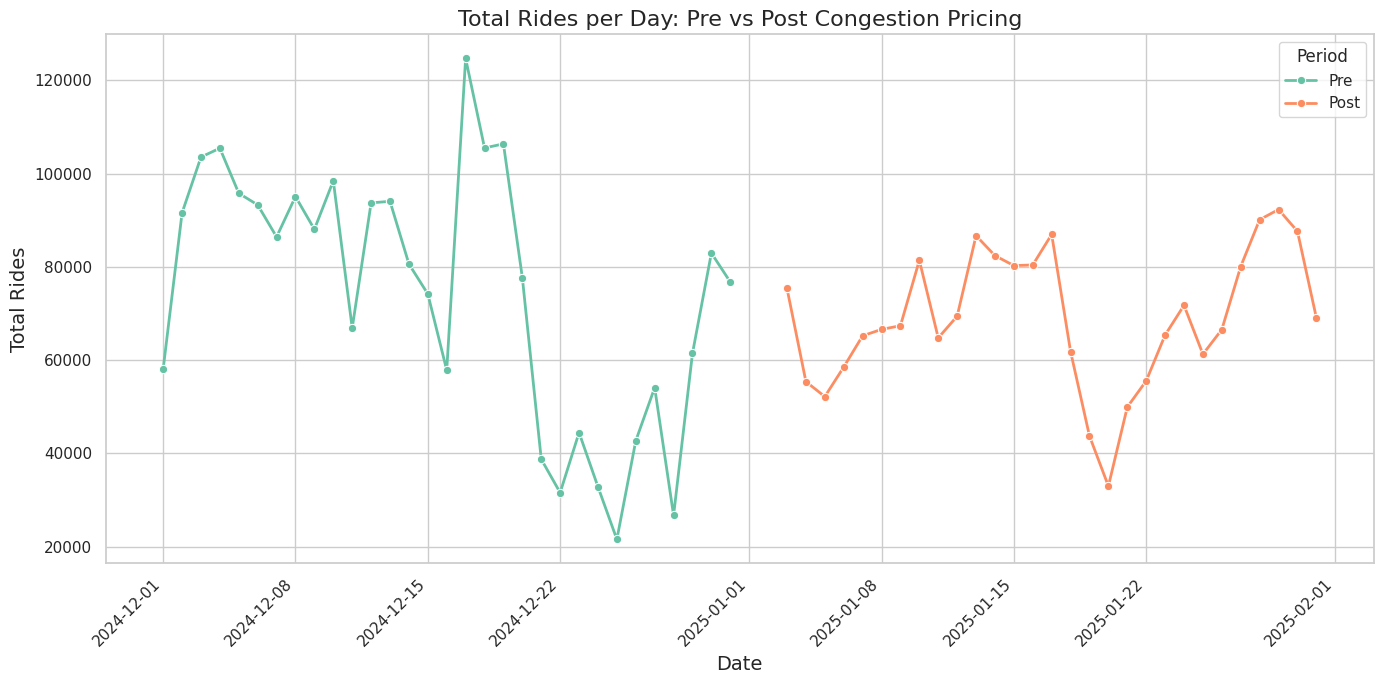

In [68]:
# Add a period column to each dataframe for easy identification of pre and post
dec_df['period'] = 'Pre'
jan_df['period'] = 'Post'

# Combine both dataframes into one
combined_df = pd.concat([dec_df, jan_df], ignore_index=True)

# Set the seaborn style for better aesthetics
sns.set(style="whitegrid")

# Plot Total Rides per day before and after congestion pricing
plt.figure(figsize=(14, 7))
sns.lineplot(data=combined_df, x='ride_date', y='total_rides', hue='period', marker='o', palette='Set2', linewidth=2)
plt.title('Total Rides per Day: Pre vs Post Congestion Pricing', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Rides', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend(title='Period')
plt.show()



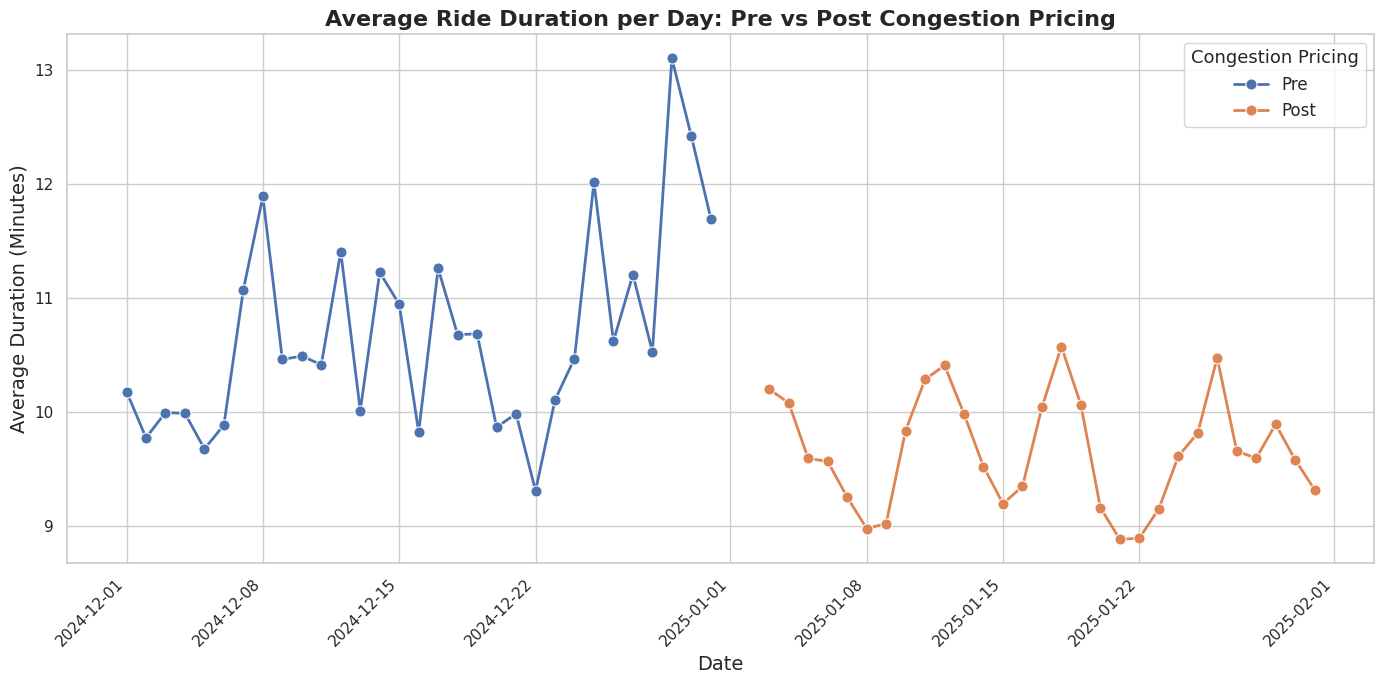

In [69]:
# Plot Average Ride Duration per day before and after congestion pricing
plt.figure(figsize=(14, 7))
sns.lineplot(data=combined_df, x='ride_date', y='avg_duration', hue='period', marker='o', linewidth=2, markersize=8)
plt.title('Average Ride Duration per Day: Pre vs Post Congestion Pricing', fontsize=16, weight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Average Duration (Minutes)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Congestion Pricing', title_fontsize='13', fontsize='12')
plt.tight_layout()
plt.show()

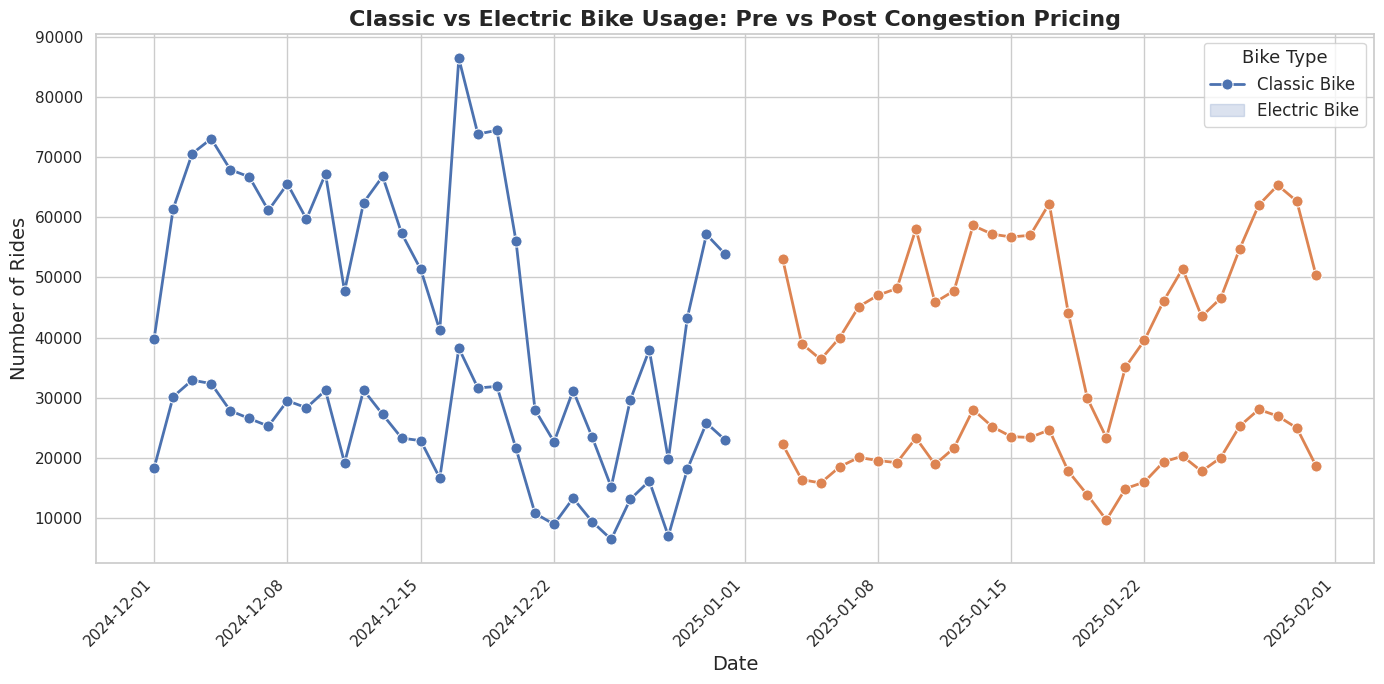

In [72]:
# Plot Bike Type Usage (Classic vs Electric) before and after congestion pricing
plt.figure(figsize=(14, 7))

# Plot Classic Bike Usage
sns.lineplot(data=combined_df, x='ride_date', y='classic_bike_rides', hue='period', marker='o', linewidth=2, markersize=8)

# Plot Electric Bike Usage
sns.lineplot(data=combined_df, x='ride_date', y='electric_bike_rides', hue='period', marker='o', linewidth=2, markersize=8)

# Set the plot title and labels
plt.title('Classic vs Electric Bike Usage: Pre vs Post Congestion Pricing', fontsize=16, weight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Rides', fontsize=14)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Customize the legend to make it more readable
plt.legend(title='Bike Type', title_fontsize='13', fontsize='12', labels=['Classic Bike', 'Electric Bike'])

# Adjust layout to avoid clipping
plt.tight_layout()

# Show the plot
plt.show()


In [76]:
# Checking the summary of the data to make sure everything is correct
summary_df = combined_df.groupby(['ride_date', 'period']).agg(
    total_rides=('total_rides', 'sum'),
    classic_bike_rides=('classic_bike_rides', 'sum'),
    electric_bike_rides=('electric_bike_rides', 'sum'),
    casual_rides=('casual_rides', 'sum'),
    member_rides=('member_rides', 'sum')
).reset_index()

# Display the first few rows of the summary
summary_df


,ride_date,period,total_rides,classic_bike_rides,electric_bike_rides,casual_rides,member_rides
0,2024-12-01,Pre,58068,18296,39772,8029,50039
1,2024-12-02,Pre,91558,30156,61402,8289,83269
2,2024-12-03,Pre,103529,32927,70602,9425,94104
3,2024-12-04,Pre,105428,32341,73087,9791,95637
4,2024-12-05,Pre,95766,27824,67942,9110,86656
5,2024-12-06,Pre,93275,26544,66731,9867,83408
6,2024-12-07,Pre,86413,25267,61146,14234,72179
7,2024-12-08,Pre,95065,29490,65575,16955,78110
8,2024-12-09,Pre,88039,28327,59712,8763,79276
9,2024-12-10,Pre,98444,31206,67238,9788,88656


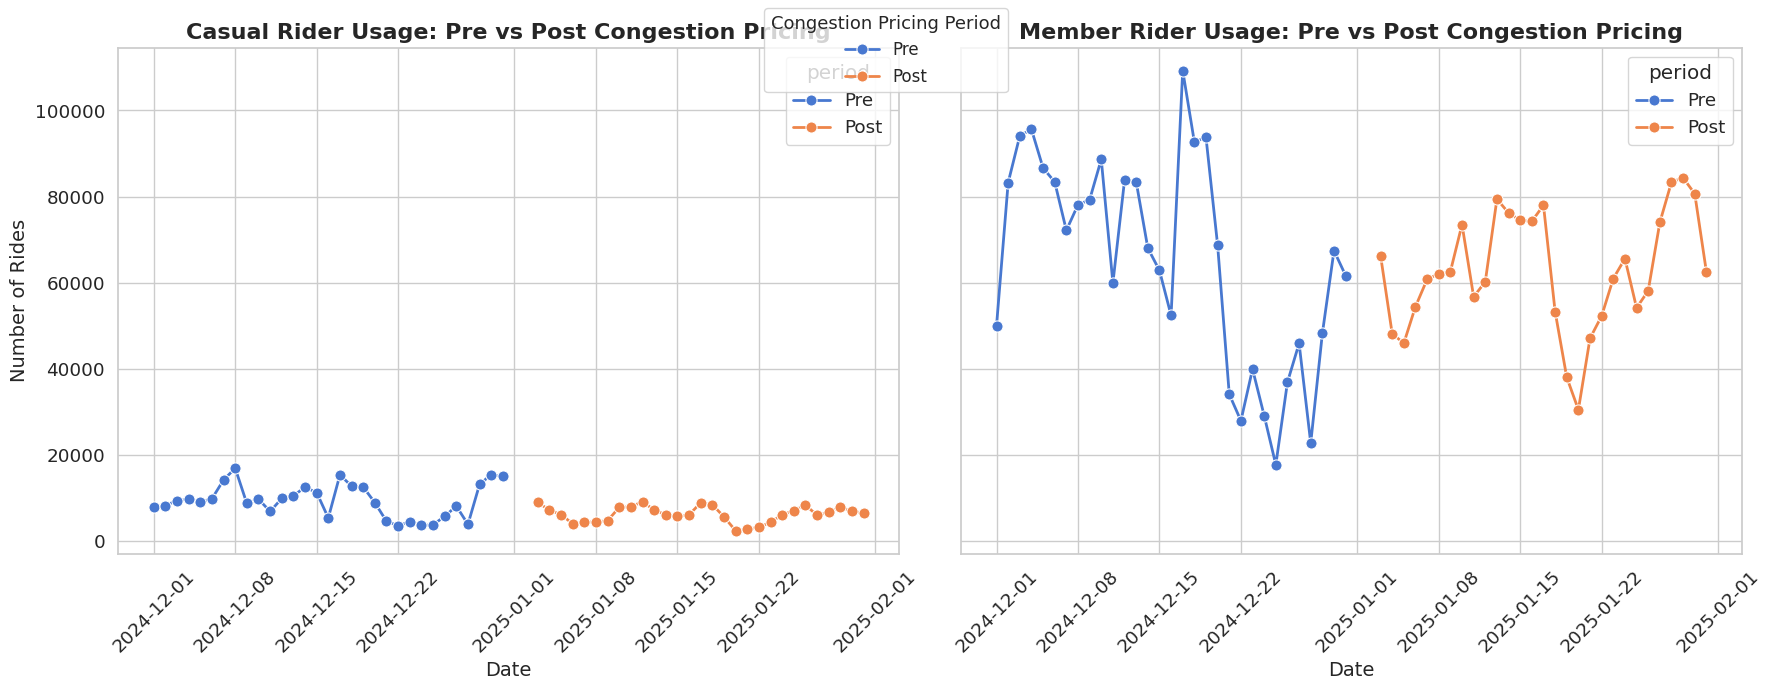

In [82]:
# Set the style for the plots
sns.set(style="whitegrid", palette="muted", font_scale=1.2)

# Create a 1x2 subplot layout (one for Casual Riders, one for Member Riders)
fig, axes = plt.subplots(1, 2, figsize=(18, 7), sharey=True)

# Plot Casual Rider Usage
sns.lineplot(data=combined_df, x='ride_date', y='casual_rides', hue='period', marker='o', linewidth=2, markersize=8, ax=axes[0])
axes[0].set_title('Casual Rider Usage: Pre vs Post Congestion Pricing', fontsize=16, weight='bold')
axes[0].set_xlabel('Date', fontsize=14)
axes[0].set_ylabel('Number of Rides', fontsize=14)
axes[0].tick_params(axis='x', rotation=45)

# Plot Member Rider Usage
sns.lineplot(data=combined_df, x='ride_date', y='member_rides', hue='period', marker='o', linewidth=2, markersize=8, ax=axes[1])
axes[1].set_title('Member Rider Usage: Pre vs Post Congestion Pricing', fontsize=16, weight='bold')
axes[1].set_xlabel('Date', fontsize=14)
axes[1].set_ylabel('Number of Rides', fontsize=14)
axes[1].tick_params(axis='x', rotation=45)

# Add a common legend for both subplots
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title='Congestion Pricing Period', loc='upper center', fontsize=12, title_fontsize=13)

# Tight layout to avoid clipping
plt.tight_layout()
plt.show()


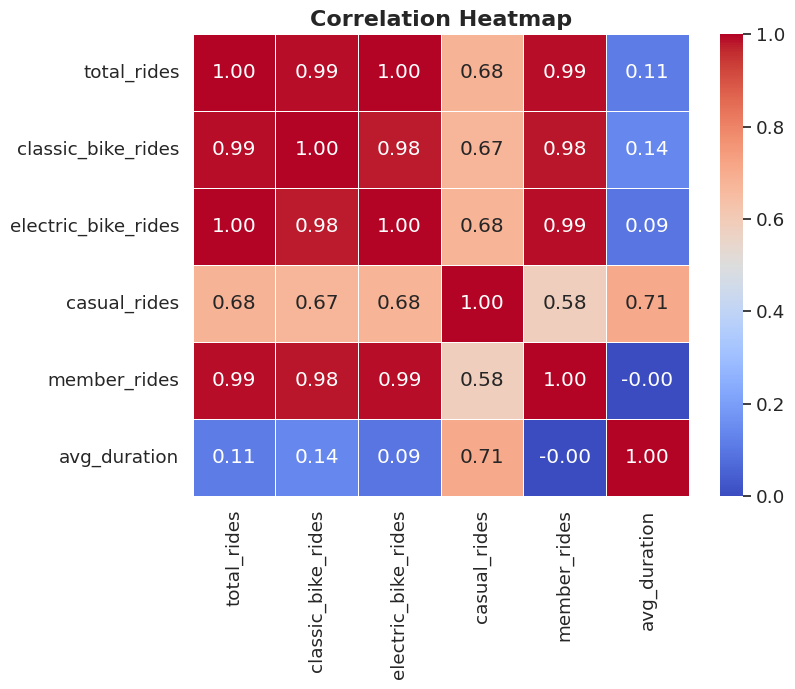

In [83]:
# Compute the correlation matrix
corr = combined_df[['total_rides', 'classic_bike_rides', 'electric_bike_rides', 'casual_rides', 'member_rides', 'avg_duration']].corr()

# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16, weight='bold')
plt.show()


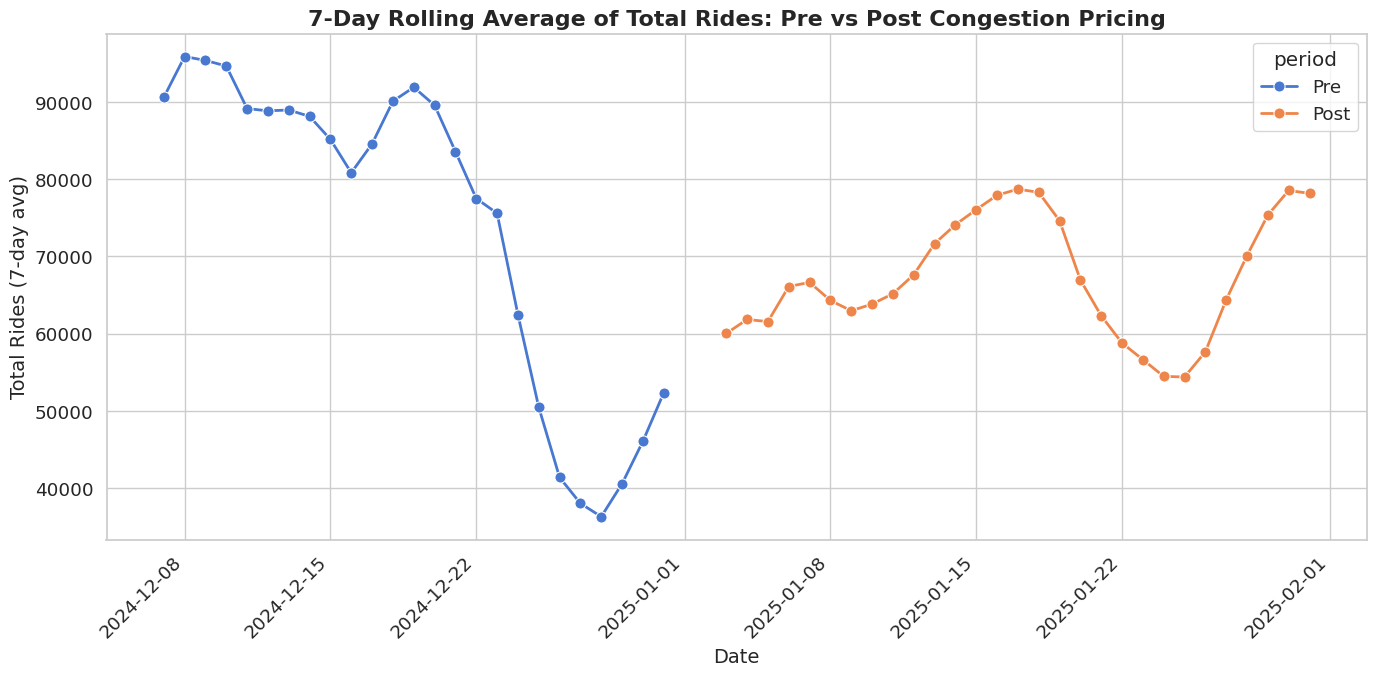

In [84]:
# Calculate rolling averages (7-day window)
combined_df['total_rides_7d'] = combined_df['total_rides'].rolling(window=7).mean()
combined_df['avg_duration_7d'] = combined_df['avg_duration'].rolling(window=7).mean()

# Plot rolling averages for total rides
plt.figure(figsize=(14, 7))
sns.lineplot(data=combined_df, x='ride_date', y='total_rides_7d', hue='period', marker='o', linewidth=2, markersize=8)
plt.title('7-Day Rolling Average of Total Rides: Pre vs Post Congestion Pricing', fontsize=16, weight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Rides (7-day avg)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
